# Digit Recognizer



## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.python import keras
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

tf.config.optimizer.set_jit(True)

## Utils Functions

In [2]:
img_rows, img_cols = 28, 28
num_classes = 10


def data_prep(raw):
    out_y = keras.utils.np_utils.to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:, 1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

## Loading the data and preprocessing

In [3]:
train_file = "../data/train.csv"
test_file = "../data/test.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Split the data into training and validation sets
train_x, train_y = np.array(train_df.iloc[:, 1:]), np.array(train_df.iloc[:, 0])
x_all, y_all = data_prep(train_df)
x_train, x_valid, y_train, y_valid = train_test_split(x_all, y_all, test_size=0.2, random_state=13)

                                                                   Random examples                                                                    


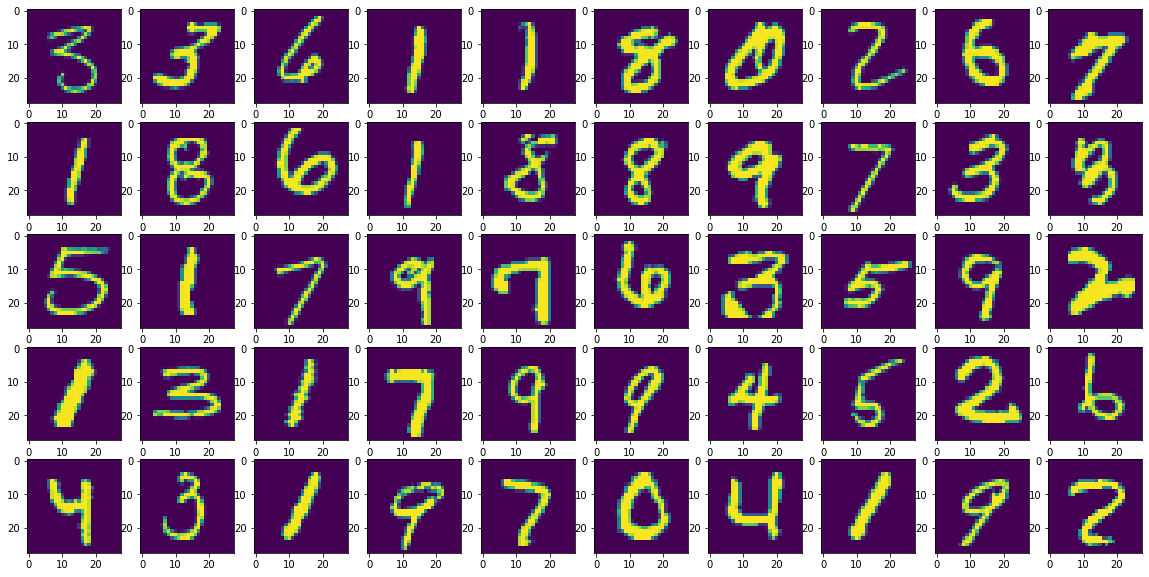

In [4]:
from matplotlib import pyplot as plt

index = np.random.randint(0, train_x.shape[0], 50)
plt.figure(figsize = (20, 10))

for i, idx in enumerate(index):
    plt.subplot(5, 10, i+1)
    plt.imshow(np.resize(train_x[idx], (28, 28, 1)))
print("Random examples".center(150))
plt.show()

## Building the model

### Using model v1
Test loss: 0.08131647109985352

Test accuracy: 0.983214259147644

In [5]:
from models.v1 import get_model as get_model_v1

# model_v1 = get_model_v1(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

### Using model v2

Test loss: 0.04811876639723778

Test accuracy: 0.9892857074737549

In [6]:
from models.v2 import get_model as get_model_v2

# model_v2 = get_model_v2(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

## Using model v3

In [7]:
from models.v3 import get_model as get_model_v3

model_v3 = get_model_v3(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

TypeError: get_model() takes 3 positional arguments but 7 were given

## Using model v4

In [ ]:
from models.v4 import get_model as get_model_v4

model_v4 = get_model_v4(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

2022-03-29 21:10:35.704457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-29 21:10:35.704593: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-03-29 21:10:35.948468: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-29 21:10:35.950866: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1658] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).
2022-03-29 21:10:36.105435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
 496/1050 [=============>................] - ETA: 23s - loss: 2.3050 - accuracy: 0.1108

KeyboardInterrupt: 

## Traning the model on the entire training set

In [ ]:
model.fit(x_all, y_all,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
329/329 [==============================] - 66s 199ms/step - loss: 0.0217 - accuracy: 0.9945
Epoch 2/10
329/329 [==============================] - 65s 196ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 3/10
329/329 [==============================] - 65s 199ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 4/10
329/329 [==============================] - 69s 211ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 5/10
329/329 [==============================] - 75s 227ms/step - loss: 0.0047 - accuracy: 0.9983
Epoch 6/10
329/329 [==============================] - 75s 229ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 7/10
329/329 [==============================] - 77s 235ms/step - loss: 0.0050 - accuracy: 0.9984
Epoch 8/10
329/329 [==============================] - 550s 2s/step - loss: 0.0040 - accuracy: 0.9987
Epoch 9/10
329/329 [==============================] - 41s 125ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 10/10
329/329 [==============================] - 41s 126ms/step - los

## Submission
### Preparing the test data

In [ ]:
## Prepare the test data
raw = test_df
num_images = raw.shape[0]
x_as_array = raw.values[:]
x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
x_test = x_shaped_array / 255

### Making predictions

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
pred = pd.Series(pred, name="Label")

2022-03-28 19:38:49.344483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
submission = pd.DataFrame(data={
    "ImageId": list(range(1, num_images+1)),
    "Label": pred})
# submission.ImageId = submission.ImageId.astype(int)
submission.to_csv("submission.csv", index=False)

## Visualizing the model

In [ ]:
from tensorflow.python.keras.utils.plot_model
keras.utils.plot_model(model, to_file='model.png')

SyntaxError: invalid syntax (944965991.py, line 1)